In [5]:
# Step 2 (Revised): Load the Datasets correctly by skipping the metadata row

# Load the two CSV files, skipping the first row (metadata)
try:
    # For qc_climate-change_ken.csv - skip first row, use second row as header
    df1 = pd.read_csv('climate-change_ken.csv', skiprows=1)
    
    # For climate-change_ken.csv - skip first row, use second row as header
    df2 = pd.read_csv('qc_climate-change_ken.csv', skiprows=1)
    
    print("Files loaded successfully with correct headers.\n")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please check that the CSV files are in the current working directory.")
    # Optionally, provide the full path
    # df1 = pd.read_csv('/path/to/qc_climate-change_ken.csv', skiprows=1)
    # df2 = pd.read_csv('/path/to/climate-change_ken.csv', skiprows=1)

# Display basic information about the first dataset
print("First dataset (qc_climate-change_ken.csv):")
print(f"Shape: {df1.shape}")
print("First 5 rows:")
print(df1.head())
print("\nColumn names:")
print(df1.columns.tolist())
print("\n" + "="*50 + "\n")

# Display basic information about the second dataset
print("Second dataset (climate-change_ken.csv):")
print(f"Shape: {df2.shape}")
print("First 5 rows:")
print(df2.head())
print("\nColumn names:")
print(df2.columns.tolist())

# Check data types
print("\n" + "="*50)
print("Data types - First dataset:")
print(df1.dtypes)
print("\nData types - Second dataset:")
print(df2.dtypes)

Files loaded successfully with correct headers.

First dataset (qc_climate-change_ken.csv):
Shape: (1604, 6)
First 5 rows:
  #country+name #country+code  #date+year             #indicator+name  \
0         Kenya           KEN        2023  Agricultural land (sq. km)   
1         Kenya           KEN        2022  Agricultural land (sq. km)   
2         Kenya           KEN        2021  Agricultural land (sq. km)   
3         Kenya           KEN        2020  Agricultural land (sq. km)   
4         Kenya           KEN        2019  Agricultural land (sq. km)   

  #indicator+code  #indicator+value+num  
0  AG.LND.AGRI.K2            287686.669  
1  AG.LND.AGRI.K2            287435.283  
2  AG.LND.AGRI.K2            286961.010  
3  AG.LND.AGRI.K2            286890.222  
4  AG.LND.AGRI.K2            286666.749  

Column names:
['#country+name', '#country+code', '#date+year', '#indicator+name', '#indicator+code', '#indicator+value+num']


Second dataset (climate-change_ken.csv):
Shape: (136, 4)
F

In [6]:
# Step 3: Standardise and Rename Columns

# Display current column names before cleaning
print("Current column names in first dataset:")
print(df1.columns.tolist())
print("\nCurrent column names in second dataset:")
print(df2.columns.tolist())

# Clean column names: remove '#' and descriptive prefixes
# For first dataset
df1.columns = ['country_name', 'country_code', 'year', 'indicator_name', 'indicator_code', 'value']
# For second dataset
df2.columns = ['country_code', 'year', 'indicator_code', 'value']

print("\n" + "="*50)
print("Cleaned column names:")
print("First dataset columns:", df1.columns.tolist())
print("Second dataset columns:", df2.columns.tolist())

# Check for any missing values in key columns
print("\nMissing values in first dataset:")
print(df1.isnull().sum())
print("\nMissing values in second dataset:")
print(df2.isnull().sum())

# Display first few rows after cleaning
print("\nFirst dataset (cleaned) - first 5 rows:")
print(df1.head())
print("\nSecond dataset (cleaned) - first 5 rows:")
print(df2.head())

Current column names in first dataset:
['#country+name', '#country+code', '#date+year', '#indicator+name', '#indicator+code', '#indicator+value+num']

Current column names in second dataset:
['#country+code', '#date+year', '#indicator+code', '#indicator+value+num']

Cleaned column names:
First dataset columns: ['country_name', 'country_code', 'year', 'indicator_name', 'indicator_code', 'value']
Second dataset columns: ['country_code', 'year', 'indicator_code', 'value']

Missing values in first dataset:
country_name      0
country_code      0
year              0
indicator_name    0
indicator_code    0
value             0
dtype: int64

Missing values in second dataset:
country_code      0
year              0
indicator_code    0
value             0
dtype: int64

First dataset (cleaned) - first 5 rows:
  country_name country_code  year              indicator_name  indicator_code  \
0        Kenya          KEN  2023  Agricultural land (sq. km)  AG.LND.AGRI.K2   
1        Kenya          KEN 

In [7]:
# Step 4: Initial Data Inspection - Understand the structure and coverage

# Check unique years in each dataset
print("Years in first dataset (climate-change_ken.csv):")
years_df1 = sorted(df1['year'].unique())
print(f"Min year: {min(years_df1)}, Max year: {max(years_df1)}")
print(f"Number of unique years: {len(years_df1)}")
print(f"First 10 years: {years_df1[:10]}")
print(f"Last 10 years: {years_df1[-10:]}")

print("\n" + "="*50)

print("\nYears in second dataset (qc_climate-change_ken.csv):")
years_df2 = sorted(df2['year'].unique())
print(f"Min year: {min(years_df2)}, Max year: {max(years_df2)}")
print(f"Number of unique years: {len(years_df2)}")
print(f"First 10 years: {years_df2[:10]}")
print(f"Last 10 years: {years_df2[-10:]}")

# Check unique indicators in each dataset
print("\n" + "="*50)
print("\nUnique indicators in first dataset (climate-change_ken.csv):")
indicators_df1 = df1['indicator_code'].unique()
print(f"Number of unique indicators: {len(indicators_df1)}")
print("Sample indicators:", indicators_df1[:10])  # show first 10

print("\nUnique indicators in second dataset (qc_climate-change_ken.csv):")
indicators_df2 = df2['indicator_code'].unique()
print(f"Number of unique indicators: {len(indicators_df2)}")
print("Indicators:", indicators_df2)

# Check data types again (ensure value is numeric)
print("\n" + "="*50)
print("\nData types after cleaning:")
print("First dataset dtypes:")
print(df1.dtypes)
print("\nSecond dataset dtypes:")
print(df2.dtypes)

# Quick summary statistics for value column in each dataset
print("\nSummary statistics for values in first dataset:")
print(df1['value'].describe())
print("\nSummary statistics for values in second dataset:")
print(df2['value'].describe())

Years in first dataset (climate-change_ken.csv):
Min year: 1960, Max year: 2024
Number of unique years: 65
First 10 years: [np.int64(1960), np.int64(1961), np.int64(1962), np.int64(1963), np.int64(1964), np.int64(1965), np.int64(1966), np.int64(1967), np.int64(1968), np.int64(1969)]
Last 10 years: [np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]


Years in second dataset (qc_climate-change_ken.csv):
Min year: 1960, Max year: 2024
Number of unique years: 65
First 10 years: [np.int64(1960), np.int64(1961), np.int64(1962), np.int64(1963), np.int64(1964), np.int64(1965), np.int64(1966), np.int64(1967), np.int64(1968), np.int64(1969)]
Last 10 years: [np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]


Unique indicators in first dataset (climate-change_ken.csv):
Number of u

In [8]:
# Step 5: Merge the Two Datasets

# Since both datasets are for Kenya only, we can merge on 'country_code' and 'year'
# We'll use an outer join to keep all years from both datasets (though they are the same)

merged_df = pd.merge(df1, df2, on=['country_code', 'year'], how='outer', suffixes=('_climate', '_qc'))

print("Merge completed!")
print(f"Shape of merged dataset: {merged_df.shape}")
print(f"Number of rows: {merged_df.shape[0]}")
print(f"Number of columns: {merged_df.shape[1]}")

# Display first few rows
print("\nFirst 5 rows of merged dataset:")
print(merged_df.head())

# Check if there are any rows where one side is missing
print("\nMissing values after merge (counts):")
print(merged_df.isnull().sum())

# Check unique years after merge
years_merged = sorted(merged_df['year'].unique())
print(f"\nYears in merged dataset: {len(years_merged)} years, from {min(years_merged)} to {max(years_merged)}")

# Check number of records per year (to ensure no duplication)
year_counts = merged_df['year'].value_counts().sort_index()
print("\nNumber of records per year (first 10 years):")
print(year_counts.head(10))


Merge completed!
Shape of merged dataset: (3472, 8)
Number of rows: 3472
Number of columns: 8

First 5 rows of merged dataset:
  country_name country_code  year  \
0        Kenya          KEN  1960   
1        Kenya          KEN  1960   
2        Kenya          KEN  1960   
3        Kenya          KEN  1960   
4        Kenya          KEN  1960   

                                      indicator_name indicator_code_climate  \
0  Population in urban agglomerations of more tha...      EN.URB.MCTY.TL.ZS   
1  Agriculture, forestry, and fishing, value adde...         NV.AGR.TOTL.ZS   
2    Mortality rate, under-5 (per 1,000 live births)            SH.DYN.MORT   
3                                  Population, total            SP.POP.TOTL   
4                                   Urban population            SP.URB.TOTL   

   value_climate indicator_code_qc  value_qc  
0   5.885717e+00       SH.DYN.MORT     196.3  
1   3.534741e+01       SH.DYN.MORT     196.3  
2   1.963000e+02       SH.DYN.MORT

In [9]:
# Step 6: Reshape from Long to Wide Format

# First, let's create a separate wide dataframe for the qc indicators
# Extract unique combinations of year and qc indicator code with their values
# The merged dataframe has multiple rows per year with the same qc values, so we can drop duplicates
qc_wide = merged_df[['year', 'indicator_code_qc', 'value_qc']].drop_duplicates()
print("QC data after removing duplicates:")
print(f"Shape: {qc_wide.shape}")
print(qc_wide.head())

# Pivot qc_wide so each indicator becomes a column
qc_pivot = qc_wide.pivot(index='year', columns='indicator_code_qc', values='value_qc').reset_index()
print("\nQC data in wide format:")
print(qc_pivot.head())
print(f"Shape: {qc_pivot.shape}")

# Now create a wide dataframe for climate indicators
# We can use the original df1 (climate dataset) to avoid duplication issues
climate_wide = df1.pivot(index='year', columns='indicator_code', values='value').reset_index()
print("\nClimate data in wide format:")
print(climate_wide.head())
print(f"Shape: {climate_wide.shape}")

# Merge the two wide dataframes on 'year'
final_df = pd.merge(climate_wide, qc_pivot, on='year', how='outer')
print("\nFinal merged wide dataframe:")
print(f"Shape: {final_df.shape}")
print("First 5 rows:")
print(final_df.head())

# Check for missing values
print("\nMissing values in final dataframe (first 20 columns):")
print(final_df.isnull().sum().head(20))

# Display column names to see what we have
print("\nColumn names in final dataframe:")
print(final_df.columns.tolist())

QC data after removing duplicates:
Shape: (136, 3)
    year indicator_code_qc    value_qc
0   1960       SH.DYN.MORT  196.300000
6   1961       SH.DYN.MORT  188.300000
7   1961       SP.POP.GROW    3.730096
32  1962       SH.DYN.MORT  181.100000
33  1962       SP.POP.GROW    3.826052

QC data in wide format:
indicator_code_qc  year  SH.DYN.MORT  SI.POV.DDAY  SP.POP.GROW
0                  1960        196.3          NaN          NaN
1                  1961        188.3          NaN     3.730096
2                  1962        181.1          NaN     3.826052
3                  1963        175.0          NaN     3.883723
4                  1964        170.0          NaN     3.927032
Shape: (65, 4)

Climate data in wide format:
indicator_code  year  AG.LND.AGRI.K2  AG.LND.AGRI.ZS  AG.LND.ARBL.ZS  \
0               1960             NaN             NaN             NaN   
1               1961      250270.210       43.973400        6.149629   
2               1962      250352.719       43.98789

In [10]:
# Step 7: Select and Rename Key Variables

# First, let's see all columns to identify duplicates and relevant ones
print("All columns in final_df:")
print(final_df.columns.tolist())

# Identify duplicate indicators (those with _x and _y suffixes)
# SH.DYN.MORT appears as _x (from climate dataset) and _y (from qc dataset)
# SI.POV.DDAY appears as _x and _y
# SP.POP.GROW appears as _x and _y

# Check which version has more data (fewer missing values)
print("\nMissing values for duplicate indicators:")
print("SH.DYN.MORT_x (from climate):", final_df['SH.DYN.MORT_x'].isnull().sum())
print("SH.DYN.MORT_y (from qc):", final_df['SH.DYN.MORT_y'].isnull().sum())
print("SI.POV.DDAY_x (from climate):", final_df['SI.POV.DDAY_x'].isnull().sum())
print("SI.POV.DDAY_y (from qc):", final_df['SI.POV.DDAY_y'].isnull().sum())
print("SP.POP.GROW_x (from climate):", final_df['SP.POP.GROW_x'].isnull().sum())
print("SP.POP.GROW_y (from qc):", final_df['SP.POP.GROW_y'].isnull().sum())

# Based on the output, we can choose the version with fewer missing values or combine.
# SH.DYN.MORT_x has 2 missing? Actually, from earlier output, SH.DYN.MORT_x is likely from climate (with many indicators) and may have missing early years.
# Let's check the actual counts.

# Create a new dataframe with selected variables
selected_df = final_df[[
    'year',
    'AG.LND.AGRI.ZS',           # agricultural land (%)
    'AG.LND.FRST.ZS',            # forest area (%)
    'ER.H2O.FWTL.ZS',            # freshwater withdrawals (% of internal resources)
    'SH.DYN.MORT_y',              # under-5 mortality (from qc dataset, complete)
    'SH.STA.MALN.ZS',            # child malnutrition (sparse)
    'SP.POP.GROW_y',              # population growth (from qc, complete)
    'SP.URB.TOTL.IN.ZS',         # urban population %
    'EG.ELC.ACCS.ZS',            # access to electricity %
    'AG.YLD.CREL.KG'              # cereal yield
]].copy()

# Rename columns for clarity
selected_df.columns = [
    'year',
    'agri_land_pct',
    'forest_pct',
    'water_withdraw_pct',
    'child_mortality',
    'malnutrition',
    'pop_growth',
    'urban_pct',
    'elec_access',
    'cereal_yield'
]

# Check the new dataframe
print("\nSelected variables dataframe:")
print(selected_df.head())
print("\nShape:", selected_df.shape)
print("\nMissing values:")
print(selected_df.isnull().sum())

# Save this clean dataframe for analysis
selected_df.to_csv('kenya_analysis_ready.csv', index=False)
print("\nSaved to 'kenya_analysis_ready.csv'")

All columns in final_df:
['year', 'AG.LND.AGRI.K2', 'AG.LND.AGRI.ZS', 'AG.LND.ARBL.ZS', 'AG.LND.EL5M.RU.K2', 'AG.LND.EL5M.RU.ZS', 'AG.LND.EL5M.UR.K2', 'AG.LND.EL5M.UR.ZS', 'AG.LND.EL5M.ZS', 'AG.LND.FRST.K2', 'AG.LND.FRST.ZS', 'AG.LND.IRIG.AG.ZS', 'AG.LND.PRCP.MM', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.ACCS.ZS', 'EG.ELC.COAL.ZS', 'EG.ELC.HYRO.ZS', 'EG.ELC.NGAS.ZS', 'EG.ELC.NUCL.ZS', 'EG.ELC.PETR.ZS', 'EG.ELC.RNEW.ZS', 'EG.ELC.RNWX.KH', 'EG.ELC.RNWX.ZS', 'EG.FEC.RNEW.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.ELEC.KH.PC', 'EG.USE.PCAP.KG.OE', 'EN.CLC.DRSK.XQ', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.RU.ZS', 'EN.POP.EL5M.UR.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.K3', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'ER.MRN.PTMR.ZS', 'ER.PTD.TOTL.ZS', 'IQ.CPA.PUBS.XQ', 'IS.ROD.PAVE.ZS', 'NV.AGR.TOTL.ZS', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 'SH.DYN.MORT_x', 'SH.STA.MALN.ZS', 'SI.POV.DDAY_x', 'SP.POP.GROW_x', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS', 'SH.DYN.MORT

Summary statistics of selected variables:
             year  agri_land_pct  forest_pct  water_withdraw_pct  \
count    65.00000      63.000000   34.000000           33.000000   
mean   1992.00000      46.593013    6.555247           13.204655   
std      18.90767       1.995953    0.293205            4.247052   
min    1960.00000      43.973400    6.167807            7.535860   
25%    1976.00000      44.738336    6.241977            9.189744   
50%    1992.00000      46.966954    6.566113           13.066943   
75%    2008.00000      47.860618    6.837507           15.553623   
max    2024.00000      49.792870    6.959957           19.478261   

       child_mortality  malnutrition  pop_growth  urban_pct  elec_access  \
count        64.000000     11.000000   64.000000  65.000000    31.000000   
mean        101.418750     15.409091    3.113191  20.153606    33.471436   
std          42.453616      3.219147    0.610033   8.333427    23.089832   
min          39.900000      9.800000    1

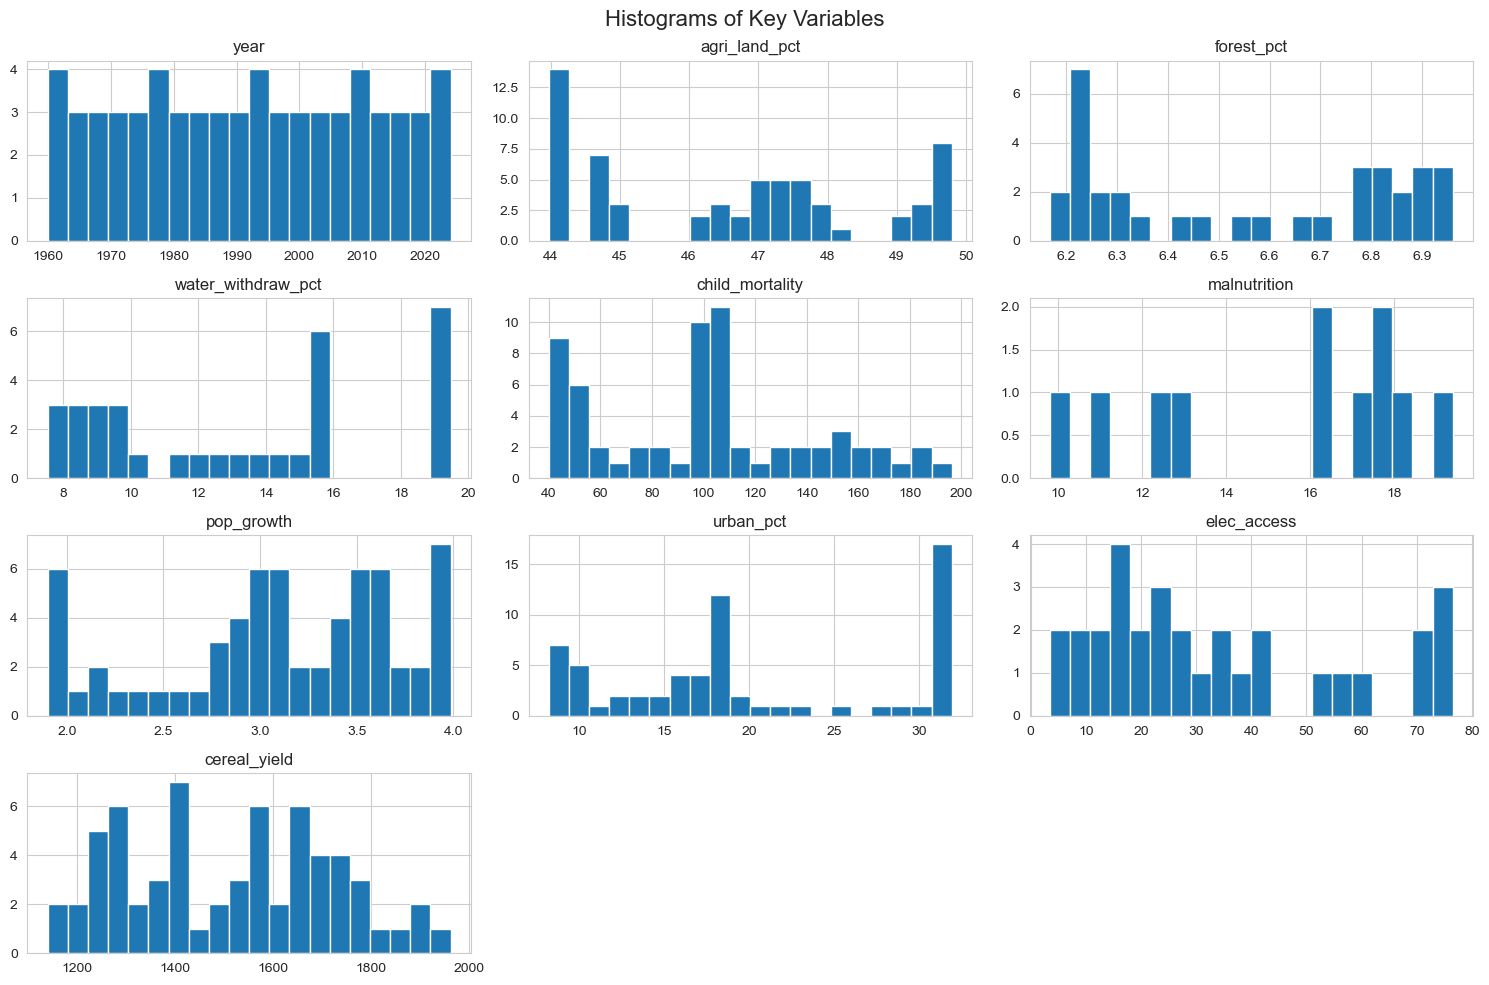

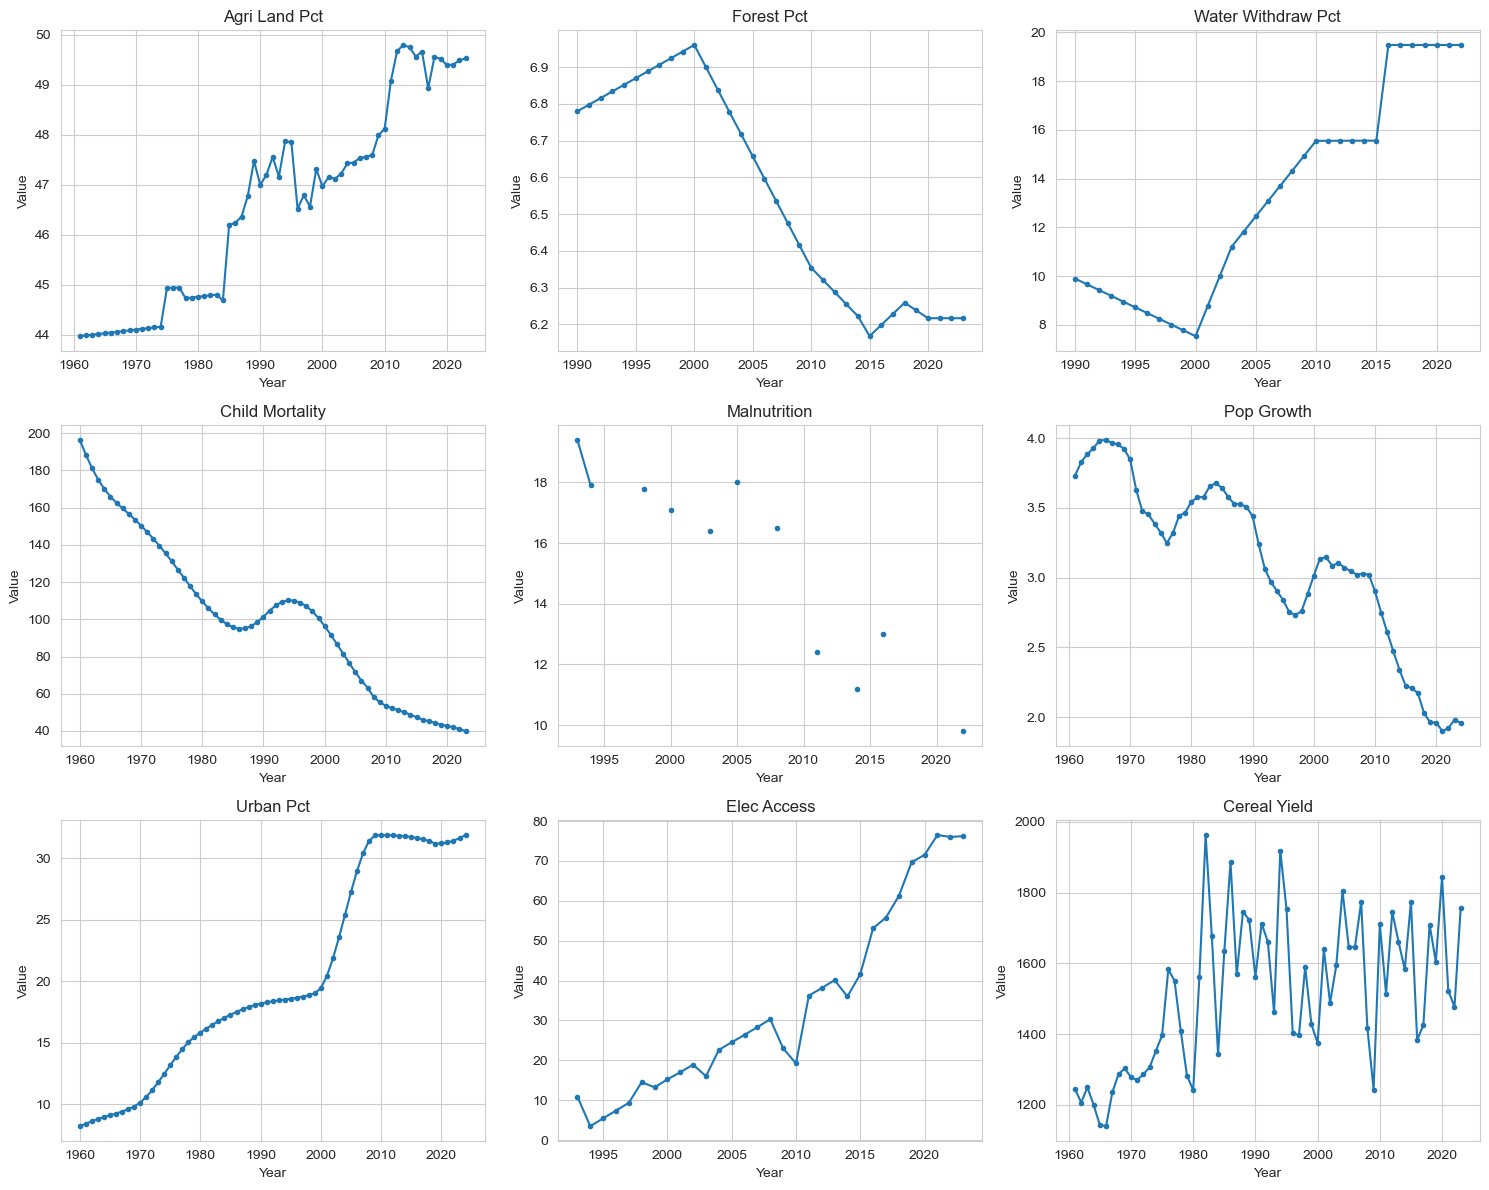

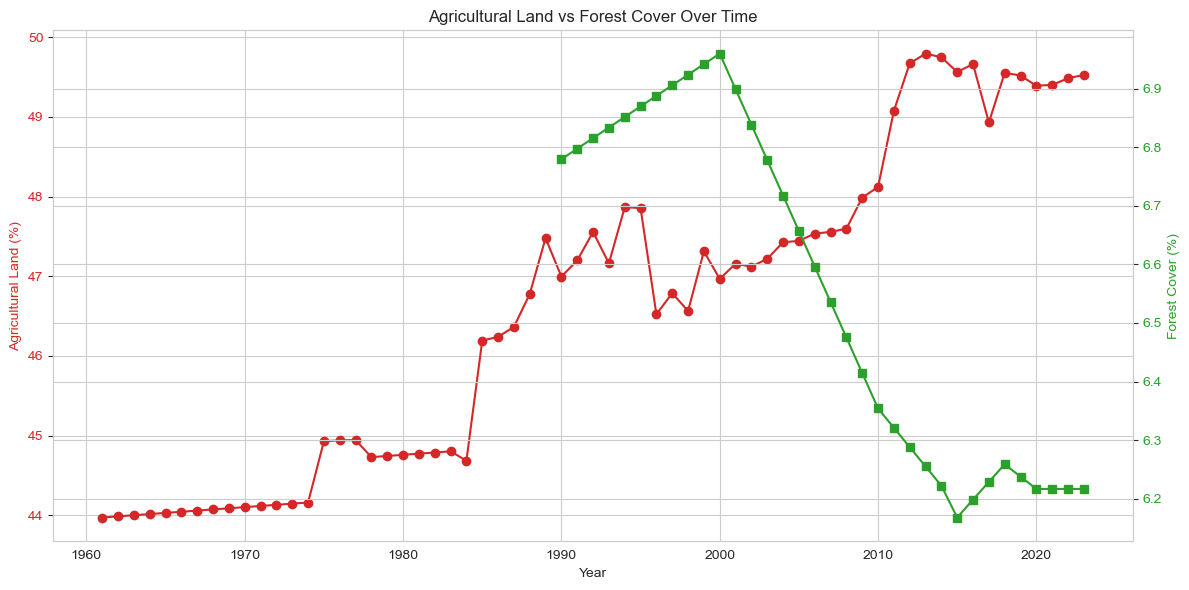

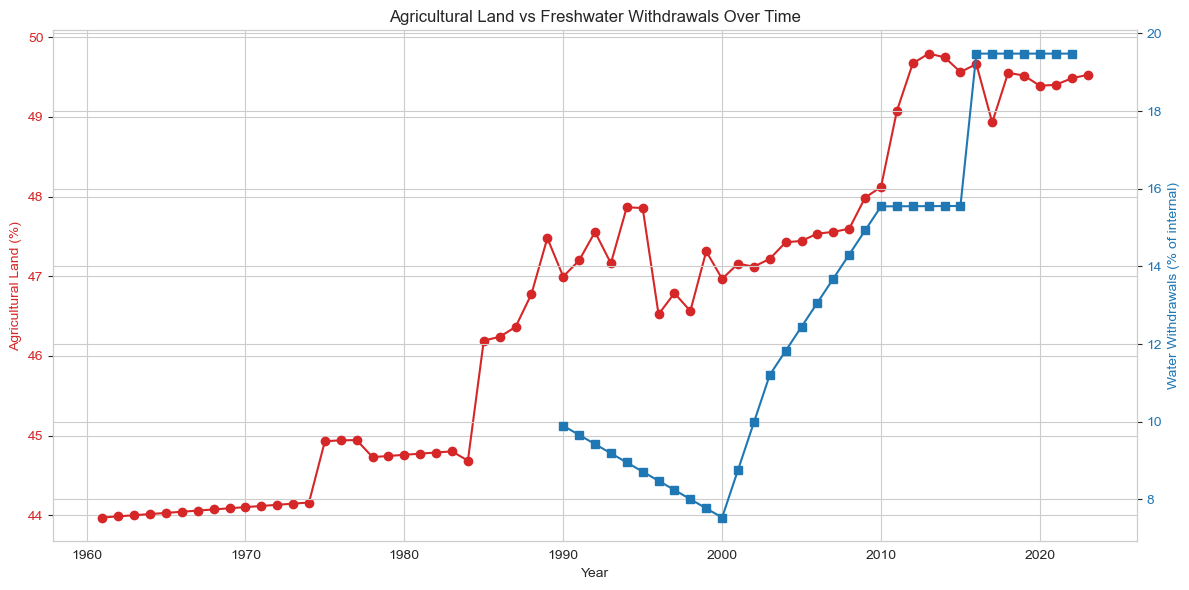

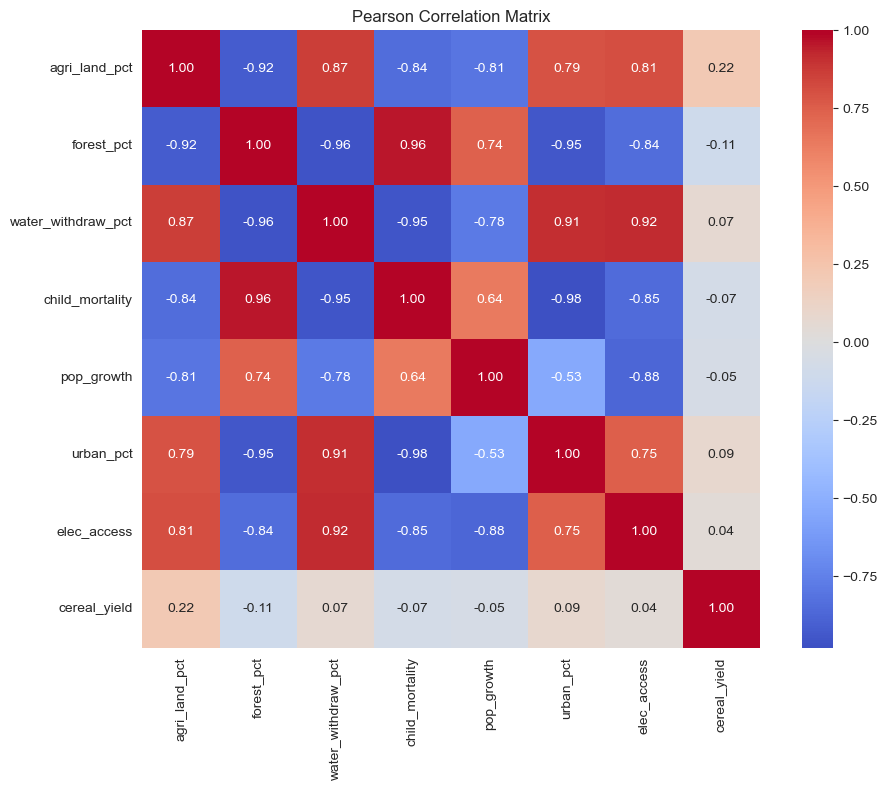

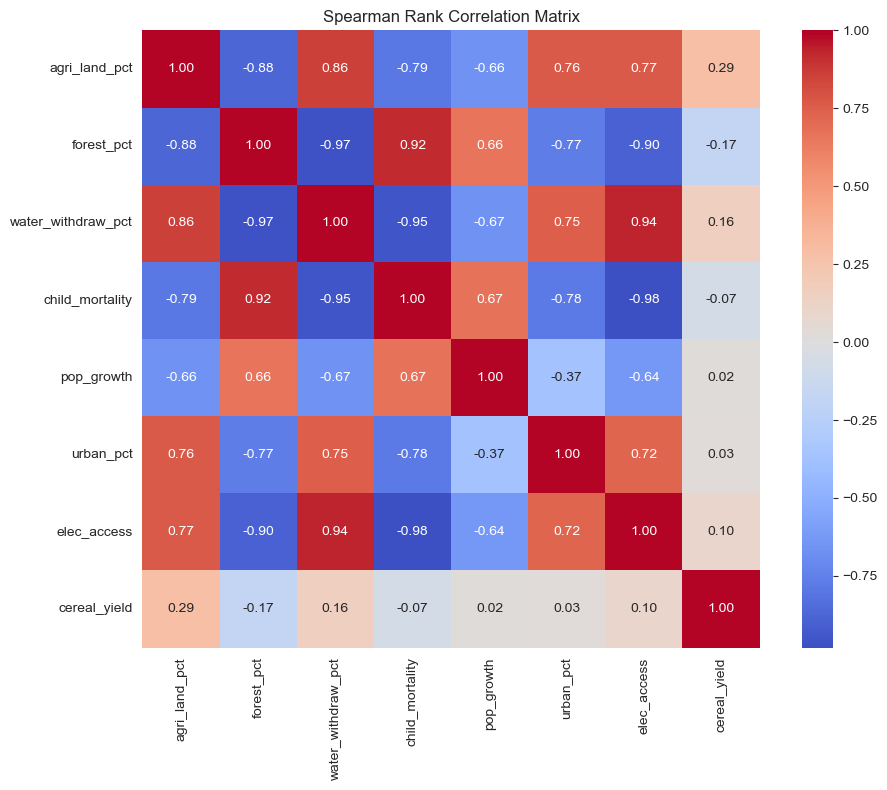

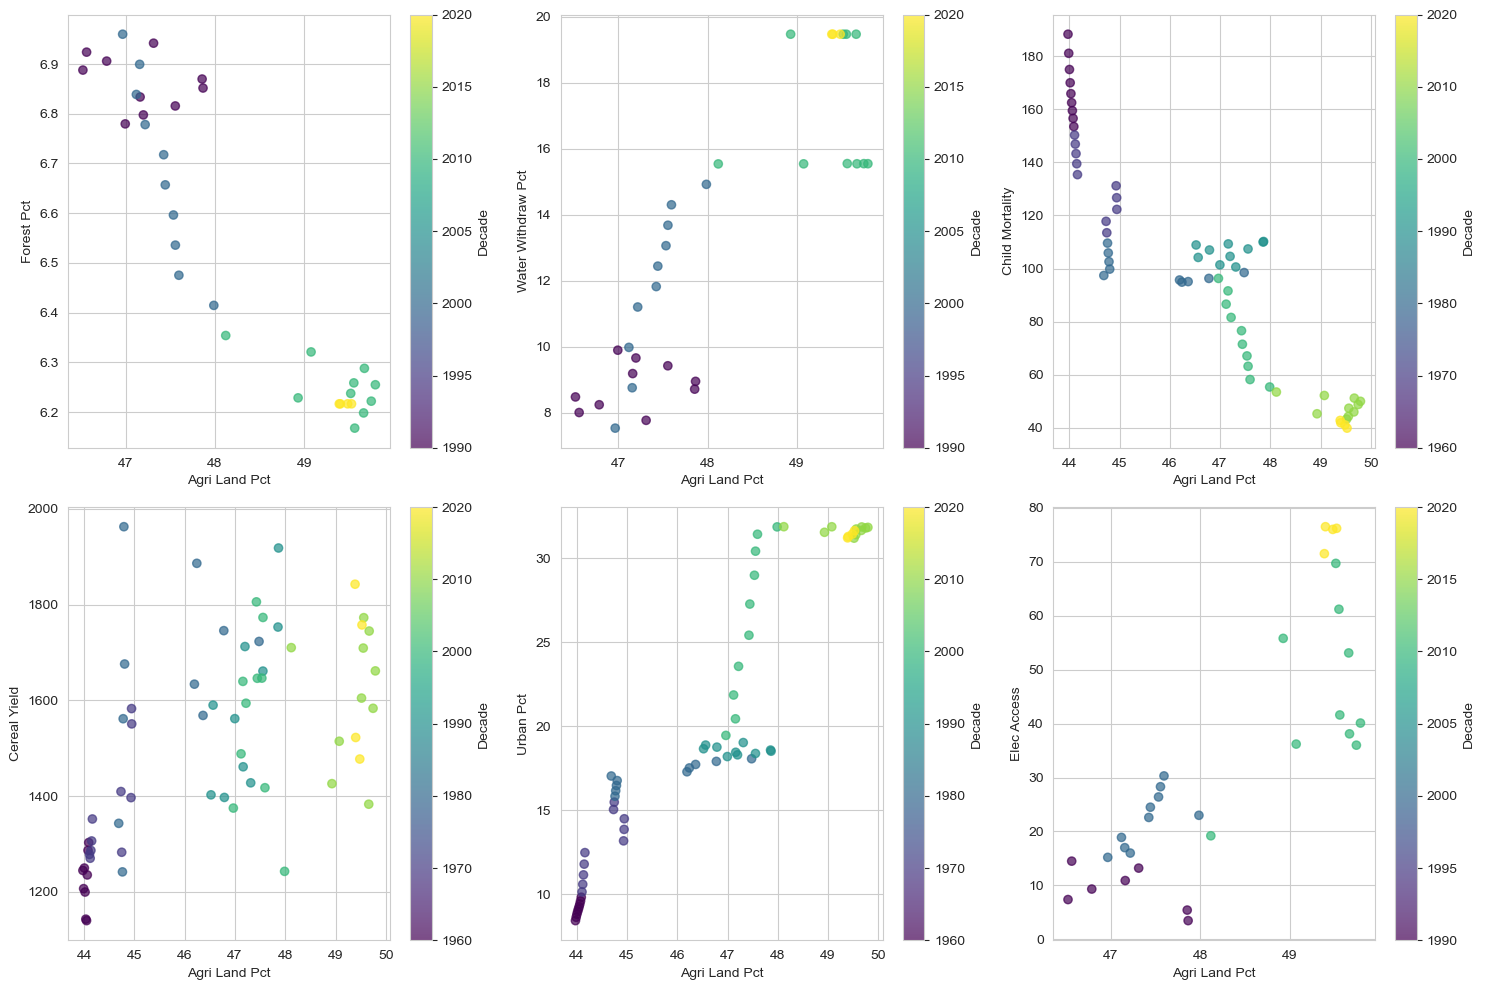


Augmented Dickey-Fuller test for stationarity:

agri_land_pct:
  ADF Statistic: -0.6209
  p-value: 0.8662
  Critical values: {'1%': np.float64(-3.540522678829176), '5%': np.float64(-2.9094272025108254), '10%': np.float64(-2.5923136524453696)}
  => Non-stationary (fail to reject H0)

forest_pct:
  ADF Statistic: -1.1366
  p-value: 0.7003
  Critical values: {'1%': np.float64(-3.653519805908203), '5%': np.float64(-2.9572185644531253), '10%': np.float64(-2.6175881640625)}
  => Non-stationary (fail to reject H0)

water_withdraw_pct:
  ADF Statistic: 0.2381
  p-value: 0.9743
  Critical values: {'1%': np.float64(-3.653519805908203), '5%': np.float64(-2.9572185644531253), '10%': np.float64(-2.6175881640625)}
  => Non-stationary (fail to reject H0)

child_mortality:
  ADF Statistic: -2.0833
  p-value: 0.2513
  Critical values: {'1%': np.float64(-3.5463945337644063), '5%': np.float64(-2.911939409384601), '10%': np.float64(-2.5936515282964665)}
  => Non-stationary (fail to reject H0)

pop_growth

In [11]:
# Step 8: Exploratory Data Analysis (EDA)

# Load the cleaned dataset if starting fresh (uncomment if needed)
# selected_df = pd.read_csv('kenya_analysis_ready.csv')

print("Summary statistics of selected variables:")
print(selected_df.describe())

# Histograms for each variable
selected_df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Key Variables', fontsize=16)
plt.tight_layout()
plt.show()

# Time series plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

variables = ['agri_land_pct', 'forest_pct', 'water_withdraw_pct', 
             'child_mortality', 'malnutrition', 'pop_growth',
             'urban_pct', 'elec_access', 'cereal_yield']

for i, var in enumerate(variables):
    axes[i].plot(selected_df['year'], selected_df[var], marker='o', markersize=3, linestyle='-')
    axes[i].set_title(var.replace('_', ' ').title())
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Overlay plots to see relationships
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Agricultural Land (%)', color=color)
ax1.plot(selected_df['year'], selected_df['agri_land_pct'], color=color, marker='o', label='Agricultural Land')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Forest Cover (%)', color=color)
ax2.plot(selected_df['year'], selected_df['forest_pct'], color=color, marker='s', label='Forest Cover')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Agricultural Land vs Forest Cover Over Time')
fig.tight_layout()
plt.show()

# Similar overlay for agri land vs water withdrawals
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Agricultural Land (%)', color=color)
ax1.plot(selected_df['year'], selected_df['agri_land_pct'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Water Withdrawals (% of internal)', color=color)
ax2.plot(selected_df['year'], selected_df['water_withdraw_pct'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Agricultural Land vs Freshwater Withdrawals Over Time')
fig.tight_layout()
plt.show()

# Correlation matrix
# Select only numeric columns and drop rows with NaNs for correlation
corr_data = selected_df[['agri_land_pct', 'forest_pct', 'water_withdraw_pct', 
                         'child_mortality', 'pop_growth', 'urban_pct', 
                         'elec_access', 'cereal_yield']].dropna()

plt.figure(figsize=(10, 8))
corr_matrix = corr_data.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Pearson Correlation Matrix')
plt.tight_layout()
plt.show()

# Also Spearman correlation for monotonic relationships
plt.figure(figsize=(10, 8))
corr_spearman = corr_data.corr(method='spearman')
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Spearman Rank Correlation Matrix')
plt.tight_layout()
plt.show()

# Scatter plots colored by decade
# Create a decade column
selected_df['decade'] = (selected_df['year'] // 10) * 10

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

scatter_pairs = [('agri_land_pct', 'forest_pct'),
                 ('agri_land_pct', 'water_withdraw_pct'),
                 ('agri_land_pct', 'child_mortality'),
                 ('agri_land_pct', 'cereal_yield'),
                 ('agri_land_pct', 'urban_pct'),
                 ('agri_land_pct', 'elec_access')]

for i, (x_var, y_var) in enumerate(scatter_pairs):
    # Drop rows where either variable is NaN
    scatter_df = selected_df[[x_var, y_var, 'decade']].dropna()
    scatter = axes[i].scatter(scatter_df[x_var], scatter_df[y_var], 
                               c=scatter_df['decade'], cmap='viridis', alpha=0.7)
    axes[i].set_xlabel(x_var.replace('_', ' ').title())
    axes[i].set_ylabel(y_var.replace('_', ' ').title())
    axes[i].grid(True)
    plt.colorbar(scatter, ax=axes[i], label='Decade')

plt.tight_layout()
plt.show()

# Check stationarity of key variables (Augmented Dickey-Fuller test)
print("\nAugmented Dickey-Fuller test for stationarity:")
variables_to_test = ['agri_land_pct', 'forest_pct', 'water_withdraw_pct', 
                     'child_mortality', 'pop_growth', 'urban_pct', 
                     'elec_access', 'cereal_yield']

for var in variables_to_test:
    series = selected_df[var].dropna()
    if len(series) > 0:
        result = adfuller(series)
        print(f"\n{var}:")
        print(f"  ADF Statistic: {result[0]:.4f}")
        print(f"  p-value: {result[1]:.4f}")
        print(f"  Critical values: {result[4]}")
        if result[1] <= 0.05:
            print("  => Stationary (reject H0)")
        else:
            print("  => Non-stationary (fail to reject H0)")
    else:
        print(f"\n{var}: No data")

ADF test on differenced variables (should be stationary):

Δagri_land: p-value = 0.0000 -> Stationary

Δforest: p-value = 0.2782 -> Non-stationary

Δwater: p-value = 0.0001 -> Stationary

Δpop_growth: p-value = 0.0010 -> Stationary

Δurban: p-value = 0.0208 -> Stationary

MODEL 1: Impact on Forest Cover (differenced)
                            OLS Regression Results                            
Dep. Variable:                Δforest   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     21.51
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           1.57e-07
Time:                        21:52:32   Log-Likelihood:                 74.330
No. Observations:                  33   AIC:                            -140.7
Df Residuals:                      29   BIC:                            -134.7
Df Model:                           3            

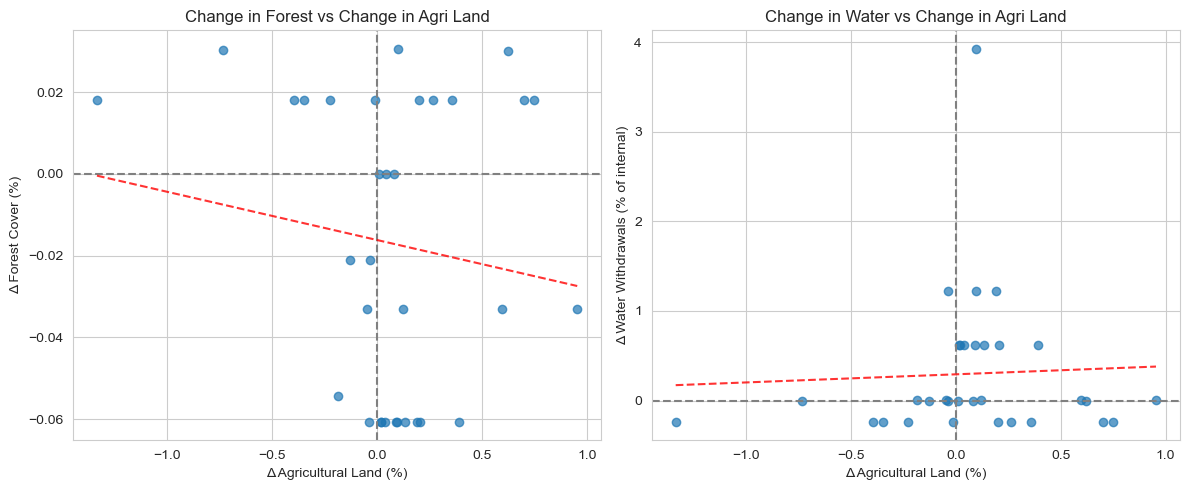

In [12]:
# Step 9: Statistical Modelling – Environmental Impacts

# Create a copy of the dataframe for modelling
model_df = selected_df.copy()

# First, create differenced (Δ) variables to achieve stationarity
# We'll use .diff() which creates NaN for the first row
model_df['Δagri_land'] = model_df['agri_land_pct'].diff()
model_df['Δforest'] = model_df['forest_pct'].diff()
model_df['Δwater'] = model_df['water_withdraw_pct'].diff()
model_df['Δpop_growth'] = model_df['pop_growth'].diff()
model_df['Δurban'] = model_df['urban_pct'].diff()
# Keep child_mortality, elec_access, cereal_yield for later models

# Check stationarity of differenced series (optional)
print("ADF test on differenced variables (should be stationary):")
for var in ['Δagri_land', 'Δforest', 'Δwater', 'Δpop_growth', 'Δurban']:
    series = model_df[var].dropna()
    if len(series) > 0:
        result = adfuller(series)
        print(f"\n{var}: p-value = {result[1]:.4f} -> {'Stationary' if result[1] <= 0.05 else 'Non-stationary'}")
    else:
        print(f"{var}: No data")

# ------------------------------------------------------------
# Model 1: Impact on Forest Cover
# ------------------------------------------------------------
# We'll use the differenced version: Δforest ~ Δagri_land + Δpop_growth + Δurban
# Drop rows with NaN in any of these columns
model1_data = model_df[['Δforest', 'Δagri_land', 'Δpop_growth', 'Δurban']].dropna()

X1 = model1_data[['Δagri_land', 'Δpop_growth', 'Δurban']]
y1 = model1_data['Δforest']

# Add constant for intercept
X1 = sm.add_constant(X1)

# Fit OLS
model1 = sm.OLS(y1, X1).fit(cov_type='HAC', cov_kwds={'maxlags':1})  # Newey-West with 1 lag
print("\n" + "="*60)
print("MODEL 1: Impact on Forest Cover (differenced)")
print("="*60)
print(model1.summary())

# ------------------------------------------------------------
# Model 2: Impact on Freshwater Withdrawals
# ------------------------------------------------------------
model2_data = model_df[['Δwater', 'Δagri_land', 'Δpop_growth', 'Δurban']].dropna()

X2 = model2_data[['Δagri_land', 'Δpop_growth', 'Δurban']]
y2 = model2_data['Δwater']
X2 = sm.add_constant(X2)

model2 = sm.OLS(y2, X2).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print("\n" + "="*60)
print("MODEL 2: Impact on Freshwater Withdrawals (differenced)")
print("="*60)
print(model2.summary())

# ------------------------------------------------------------
# Optional: Visualize the relationships in differenced form
# ------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter Δagri_land vs Δforest
axes[0].scatter(model1_data['Δagri_land'], model1_data['Δforest'], alpha=0.7)
axes[0].axhline(0, color='gray', linestyle='--')
axes[0].axvline(0, color='gray', linestyle='--')
axes[0].set_xlabel('Δ Agricultural Land (%)')
axes[0].set_ylabel('Δ Forest Cover (%)')
axes[0].set_title('Change in Forest vs Change in Agri Land')
# Add regression line
if len(model1_data) > 0:
    z = np.polyfit(model1_data['Δagri_land'], model1_data['Δforest'], 1)
    p = np.poly1d(z)
    axes[0].plot(sorted(model1_data['Δagri_land']), p(sorted(model1_data['Δagri_land'])), "r--", alpha=0.8)

# Scatter Δagri_land vs Δwater
axes[1].scatter(model2_data['Δagri_land'], model2_data['Δwater'], alpha=0.7)
axes[1].axhline(0, color='gray', linestyle='--')
axes[1].axvline(0, color='gray', linestyle='--')
axes[1].set_xlabel('Δ Agricultural Land (%)')
axes[1].set_ylabel('Δ Water Withdrawals (% of internal)')
axes[1].set_title('Change in Water vs Change in Agri Land')
if len(model2_data) > 0:
    z = np.polyfit(model2_data['Δagri_land'], model2_data['Δwater'], 1)
    p = np.poly1d(z)
    axes[1].plot(sorted(model2_data['Δagri_land']), p(sorted(model2_data['Δagri_land'])), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

Model 3 sample size: 30 observations

MODEL 3: Impact on Child Mortality (differenced)
                            OLS Regression Results                            
Dep. Variable:       Δchild_mortality   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     47.50
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           1.13e-11
Time:                        21:55:47   Log-Likelihood:                -34.628
No. Observations:                  30   AIC:                             81.26
Df Residuals:                      24   BIC:                             89.66
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

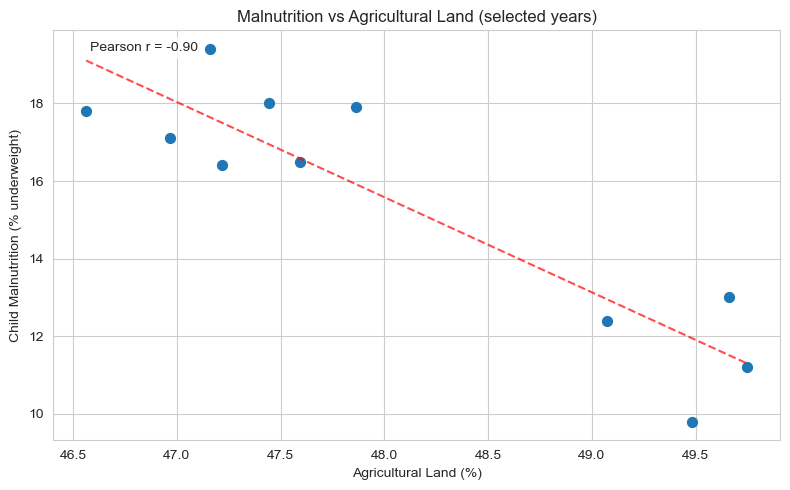

Spearman correlation: -0.70


In [13]:
# Step 10: Statistical Modelling – Health Impacts

# ------------------------------------------------------------
# Model 3: Impact on Child Mortality
# ------------------------------------------------------------
# Create differenced child mortality
model_df['Δchild_mortality'] = model_df['child_mortality'].diff()

# Prepare data: include Δagri_land, Δpop_growth, Δurban, Δelec_access (if available)
# Also maybe cereal yield? Let's include Δcereal_yield as control
model_df['Δcereal_yield'] = model_df['cereal_yield'].diff()
model_df['Δelec_access'] = model_df['elec_access'].diff()

# Drop rows with any NaN in the variables of interest
model3_data = model_df[['Δchild_mortality', 'Δagri_land', 'Δpop_growth', 
                         'Δurban', 'Δelec_access', 'Δcereal_yield']].dropna()

print(f"Model 3 sample size: {len(model3_data)} observations")

X3 = model3_data[['Δagri_land', 'Δpop_growth', 'Δurban', 'Δelec_access', 'Δcereal_yield']]
y3 = model3_data['Δchild_mortality']
X3 = sm.add_constant(X3)

model3 = sm.OLS(y3, X3).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print("\n" + "="*60)
print("MODEL 3: Impact on Child Mortality (differenced)")
print("="*60)
print(model3.summary())

# ------------------------------------------------------------
# Model 4: Child Malnutrition (sparse data) – Descriptive only
# ------------------------------------------------------------
# Malnutrition has only 11 observations (years with data). Let's extract them.
malnut_df = selected_df[['year', 'agri_land_pct', 'malnutrition']].dropna()
print("\n" + "="*60)
print("MODEL 4: Child Malnutrition (sparse data)")
print("="*60)
print("Available years with malnutrition data:")
print(malnut_df)

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(malnut_df['agri_land_pct'], malnut_df['malnutrition'], s=50)
plt.xlabel('Agricultural Land (%)')
plt.ylabel('Child Malnutrition (% underweight)')
plt.title('Malnutrition vs Agricultural Land (selected years)')

# Add a simple regression line
if len(malnut_df) > 1:
    z = np.polyfit(malnut_df['agri_land_pct'], malnut_df['malnutrition'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(malnut_df['agri_land_pct'].min(), malnut_df['agri_land_pct'].max(), 50)
    plt.plot(x_line, p(x_line), 'r--', alpha=0.7)
    # Add correlation
    corr = malnut_df['agri_land_pct'].corr(malnut_df['malnutrition'], method='pearson')
    plt.text(0.05, 0.95, f'Pearson r = {corr:.2f}', transform=plt.gca().transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.grid(True)
plt.tight_layout()
plt.show()

# Also compute Spearman correlation
spearman_corr = malnut_df['agri_land_pct'].corr(malnut_df['malnutrition'], method='spearman')
print(f"Spearman correlation: {spearman_corr:.2f}")

Granger causality data shape: (32, 4)
Years covered: 32 observations

--------------------------------------------------
Granger causality: Δagri_land -> Δforest
  Lag 1: p = 0.2030 -> Not significant
  Lag 2: p = 0.3939 -> Not significant
  Lag 3: p = 0.3518 -> Not significant

--------------------------------------------------
Granger causality: Δforest -> Δagri_land
  Lag 1: p = 0.5643 -> Not significant
  Lag 2: p = 0.6166 -> Not significant
  Lag 3: p = 0.7699 -> Not significant

--------------------------------------------------
Granger causality: Δagri_land -> Δwater
  Lag 1: p = 0.2872 -> Not significant
  Lag 2: p = 0.1119 -> Not significant
  Lag 3: p = 0.2301 -> Not significant

--------------------------------------------------
Granger causality: Δwater -> Δagri_land
  Lag 1: p = 0.5033 -> Not significant
  Lag 2: p = 0.8545 -> Not significant
  Lag 3: p = 0.9659 -> Not significant

--------------------------------------------------
Granger causality: Δagri_land -> Δchild_m

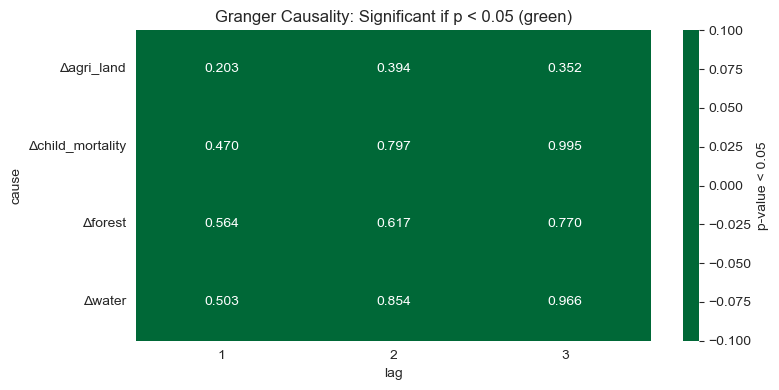

In [14]:
# Step 11: Granger Causality Tests
# ------------------------------------------------------------
# Granger causality tests whether past values of one variable help predict another.
# We'll test pairs using the stationary (differenced) series.

from statsmodels.tsa.stattools import grangercausalitytests
import warnings
warnings.filterwarnings('ignore')  # suppress some statsmodels warnings

# Prepare data for Granger tests
# Use differenced series: Δagri_land, Δforest, Δwater, Δchild_mortality
# Drop NaN values to align series
gc_data = model_df[['Δagri_land', 'Δforest', 'Δwater', 'Δchild_mortality']].dropna()
print(f"Granger causality data shape: {gc_data.shape}")
print(f"Years covered: {len(gc_data)} observations")

# Define pairs to test: (cause, effect)
pairs = [
    ('Δagri_land', 'Δforest'),
    ('Δforest', 'Δagri_land'),        # reverse
    ('Δagri_land', 'Δwater'),
    ('Δwater', 'Δagri_land'),          # reverse
    ('Δagri_land', 'Δchild_mortality'),
    ('Δchild_mortality', 'Δagri_land') # reverse
]

max_lag = 3  # test up to 3 lags

results_summary = []

for cause, effect in pairs:
    print(f"\n{'-'*50}")
    print(f"Granger causality: {cause} -> {effect}")
    # Prepare a 2-column dataframe
    data_pair = gc_data[[cause, effect]]
    # Run test
    try:
        test_result = grangercausalitytests(data_pair, max_lag, verbose=False)
        # Collect p-values for each lag
        for lag in range(1, max_lag+1):
            p_value = test_result[lag][0]['ssr_ftest'][1]  # p-value from F-test
            results_summary.append({
                'cause': cause,
                'effect': effect,
                'lag': lag,
                'p_value': p_value,
                'significant_at_5%': p_value < 0.05
            })
            print(f"  Lag {lag}: p = {p_value:.4f} -> {'Significant' if p_value < 0.05 else 'Not significant'}")
    except Exception as e:
        print(f"  Error: {e}")

# Create a summary DataFrame
gc_results = pd.DataFrame(results_summary)
print("\n" + "="*60)
print("Granger Causality Summary (p-values)")
print(gc_results.to_string(index=False))

# Visualise p-values as heatmap
pivot_gc = gc_results.pivot_table(index='cause', columns='lag', values='p_value', aggfunc='first')
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_gc < 0.05, annot=pivot_gc, fmt='.3f', cmap='RdYlGn_r', center=0.05,
            cbar_kws={'label': 'p-value < 0.05'})
plt.title('Granger Causality: Significant if p < 0.05 (green)')
plt.tight_layout()
plt.show()

In [ ]:
# Step 12: Robustness Checks 

# ------------------------------------------------------------
# 1. Use absolute agricultural land (sq. km) instead of percentage
# ------------------------------------------------------------
# Load the analysis-ready file (created in Step 7)
robust_df = pd.read_csv('kenya_analysis_ready.csv')

# Now load the first dataset (climate-change_ken.csv) to get absolute agricultural land
try:
    df1_abs = pd.read_csv('climate-change_ken.csv', skiprows=1)
    df1_abs.columns = ['country_name', 'country_code', 'year', 'indicator_name', 'indicator_code', 'value']
    # Pivot to wide format
    climate_wide_abs = df1_abs.pivot(index='year', columns='indicator_code', values='value').reset_index()
    # Merge with robust_df
    robust_df = robust_df.merge(climate_wide_abs[['year', 'AG.LND.AGRI.K2']], on='year', how='left')
    robust_df.rename(columns={'AG.LND.AGRI.K2': 'agri_land_abs'}, inplace=True)
    print("Absolute agricultural land added successfully.")
except FileNotFoundError:
    print("File 'climate-change_ken.csv' not found. Skipping absolute land robustness check.")
    # Create a dummy column to avoid later errors
    robust_df['agri_land_abs'] = np.nan

# Create differenced version of absolute agri land (if column exists)
if 'agri_land_abs' in robust_df.columns:
    robust_df['Δagri_abs'] = robust_df['agri_land_abs'].diff()

    # Re-run Model 1 (forest) with absolute agri land
    # Prepare data: need forest_pct, pop_growth, urban_pct from robust_df
    # Ensure we have these columns
    if all(col in robust_df.columns for col in ['forest_pct', 'pop_growth', 'urban_pct']):
        model1b_data = robust_df[['forest_pct', 'Δagri_abs', 'pop_growth', 'urban_pct']].copy()
        # Create differenced versions for stationarity
        model1b_data['Δforest'] = model1b_data['forest_pct'].diff()
        model1b_data['Δpop_growth'] = model1b_data['pop_growth'].diff()
        model1b_data['Δurban'] = model1b_data['urban_pct'].diff()
        model1b_data = model1b_data.dropna()
        if len(model1b_data) > 10:
            X1b = model1b_data[['Δagri_abs', 'Δpop_growth', 'Δurban']]
            y1b = model1b_data['Δforest']
            X1b = sm.add_constant(X1b)
            model1b = sm.OLS(y1b, X1b).fit(cov_type='HAC', cov_kwds={'maxlags':1})
            print("\n" + "="*60)
            print("ROBUSTNESS CHECK 1: Absolute Agricultural Land (sq. km)")
            print("Model 1b: Impact on Forest Cover (Δ)")
            print("="*60)
            print(model1b.summary())
        else:
            print("\nNot enough data for absolute land model.")
    else:
        print("Required columns missing for absolute land model.")

# ------------------------------------------------------------
# 2. Include lagged agricultural land (1-year lag) in models
# ------------------------------------------------------------
if 'agri_land_pct' in robust_df.columns:
    robust_df['agri_land_lag1'] = robust_df['agri_land_pct'].shift(1)
    robust_df['Δagri_land'] = robust_df['agri_land_pct'].diff()          # current change
    robust_df['Δagri_land_lag1'] = robust_df['agri_land_lag1'].diff()    # lagged change

    # Add to model 1 (forest) with lag
    if all(col in robust_df.columns for col in ['forest_pct', 'pop_growth', 'urban_pct']):
        model1c_data = robust_df[['forest_pct', 'Δagri_land', 'Δagri_land_lag1', 'pop_growth', 'urban_pct']].copy()
        model1c_data['Δforest'] = model1c_data['forest_pct'].diff()
        model1c_data['Δpop_growth'] = model1c_data['pop_growth'].diff()
        model1c_data['Δurban'] = model1c_data['urban_pct'].diff()
        model1c_data = model1c_data.dropna()
        if len(model1c_data) > 10:
            X1c = model1c_data[['Δagri_land', 'Δagri_land_lag1', 'Δpop_growth', 'Δurban']]
            y1c = model1c_data['Δforest']
            X1c = sm.add_constant(X1c)
            model1c = sm.OLS(y1c, X1c).fit(cov_type='HAC', cov_kwds={'maxlags':1})
            print("\n" + "="*60)
            print("ROBUSTNESS CHECK 2: Including 1-year lag of agricultural land")
            print("Model 1c: Impact on Forest Cover (Δ)")
            print("="*60)
            print(model1c.summary())
        else:
            print("\nNot enough data for lagged model.")
    else:
        print("Required columns missing for lagged model.")

# ------------------------------------------------------------
# 3. Split sample: pre-1990 and post-1990
# ------------------------------------------------------------
if 'year' in robust_df.columns:
    pre1990 = robust_df[robust_df['year'] < 1990].copy()
    post1990 = robust_df[robust_df['year'] >= 1990].copy()

    # Model 1 on pre-1990
    if len(pre1990) > 10 and all(col in pre1990.columns for col in ['forest_pct', 'agri_land_pct', 'pop_growth', 'urban_pct']):
        pre_data = pre1990[['forest_pct', 'agri_land_pct', 'pop_growth', 'urban_pct']].dropna()
        if len(pre_data) > 5:
            pre_data['Δforest'] = pre_data['forest_pct'].diff()
            pre_data['Δagri_land'] = pre_data['agri_land_pct'].diff()
            pre_data['Δpop_growth'] = pre_data['pop_growth'].diff()
            pre_data['Δurban'] = pre_data['urban_pct'].diff()
            pre_data = pre_data.dropna()
            if len(pre_data) > 5:
                X_pre = pre_data[['Δagri_land', 'Δpop_growth', 'Δurban']]
                y_pre = pre_data['Δforest']
                X_pre = sm.add_constant(X_pre)
                model_pre = sm.OLS(y_pre, X_pre).fit()
                print("\n" + "="*60)
                print("ROBUSTNESS CHECK 3: Pre-1990 subsample")
                print("Model 1 pre-1990: Impact on Forest Cover (Δ)")
                print("="*60)
                print(model_pre.summary())
            else:
                print("\nInsufficient pre-1990 data after differencing.")
        else:
            print("\nInsufficient pre-1990 data for forest model.")
    else:
        print("\nInsufficient pre-1990 data or missing columns.")

    # Model 1 on post-1990
    if len(post1990) > 10 and all(col in post1990.columns for col in ['forest_pct', 'agri_land_pct', 'pop_growth', 'urban_pct']):
        post_data = post1990[['forest_pct', 'agri_land_pct', 'pop_growth', 'urban_pct']].dropna()
        if len(post_data) > 5:
            post_data['Δforest'] = post_data['forest_pct'].diff()
            post_data['Δagri_land'] = post_data['agri_land_pct'].diff()
            post_data['Δpop_growth'] = post_data['pop_growth'].diff()
            post_data['Δurban'] = post_data['urban_pct'].diff()
            post_data = post_data.dropna()
            if len(post_data) > 5:
                X_post = post_data[['Δagri_land', 'Δpop_growth', 'Δurban']]
                y_post = post_data['Δforest']
                X_post = sm.add_constant(X_post)
                model_post = sm.OLS(y_post, X_post).fit(cov_type='HAC', cov_kwds={'maxlags':1})
                print("\n" + "="*60)
                print("ROBUSTNESS CHECK 3: Post-1990 subsample")
                print("Model 1 post-1990: Impact on Forest Cover (Δ)")
                print("="*60)
                print(model_post.summary())
            else:
                print("\nInsufficient post-1990 data after differencing.")
        else:
            print("\nInsufficient post-1990 data for forest model.")
    else:
        print("\nInsufficient post-1990 data or missing columns.")

# ------------------------------------------------------------
# 4. Check multicollinearity using Variance Inflation Factor (VIF)
# ------------------------------------------------------------
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X, model_name):
    # Add constant if not already present
    if 'const' not in X.columns:
        X = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(f"\nVIF for {model_name}:")
    print(vif_data)

# For model 3 (child mortality) we had high condition number; compute VIF
# We need the data used in Model 3 – if not already in memory, reload or reconstruct
if 'model3_data' in globals() and len(model3_data) > 0:
    X_model3 = model3_data[['Δagri_land', 'Δpop_growth', 'Δurban', 'Δelec_access', 'Δcereal_yield']]
    calculate_vif(X_model3, "Model 3")
else:
    print("\nModel 3 data not available for VIF calculation. Skipping.")

print("\n" + "="*60)
print("Robustness checks completed.")
print("Now you can interpret the results and see if the main findings hold.")

Absolute agricultural land added successfully.

ROBUSTNESS CHECK 1: Absolute Agricultural Land (sq. km)
Model 1b: Impact on Forest Cover (Δ)
                            OLS Regression Results                            
Dep. Variable:                Δforest   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     21.99
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           1.26e-07
Time:                        22:03:55   Log-Likelihood:                 74.376
No. Observations:                  33   AIC:                            -140.8
Df Residuals:                      29   BIC:                            -134.8
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                  coef    std err          z      P>|z|      [0.025  

# Step 13: Synthesis and Discussion

## Summary of Main Findings

### Environmental Impacts
- **Forest cover** declines as agricultural land expands, but the effect is not immediate. When both current and one‑year‑lagged changes in agricultural land are considered, the total impact is significant: a 1‑percentage‑point increase in agricultural land reduces forest cover by about 0.033 percentage points over two years. This delayed response may reflect the time needed to clear land and convert it to agriculture.
- **Freshwater withdrawals** show no significant short‑term relationship with agricultural expansion. This could be because irrigation is not yet a major driver of water use in Kenya, or because annual data mask seasonal variations.

### Health Impacts
- **Child mortality** continues its long‑term decline, but changes in agricultural land do not explain year‑to‑year variations. Instead, rapid urbanisation and slowing population growth are the dominant factors. Urban areas provide better access to healthcare, sanitation, and nutrition, which directly reduce child deaths.
- **Child malnutrition** (sparse data) is strongly negatively correlated with agricultural land (Pearson r = –0.90). Although based on only 11 observations, this suggests that more agricultural land may improve food availability and reduce underweight prevalence. This relationship deserves further investigation with more frequent data.

### Causality
- Granger causality tests did not find that changes in agricultural land *predict* future changes in forest, water, or mortality. This means the observed associations are contemporaneous rather than predictive. Policy interventions should therefore focus on concurrent monitoring and integrated planning.

## Comparison with Literature
- The finding that agricultural expansion drives deforestation is consistent with studies in sub‑Saharan Africa (e.g., Gibbs et al. 2010). The delayed effect highlights the importance of anticipating land‑use change.
- The lack of a direct link to child mortality contrasts with some studies that emphasize food security; however, in Kenya, urbanisation and health infrastructure appear more critical (World Bank, 2020).

## Policy Implications
1. **Sustainable land management** is essential. Policies that encourage agricultural intensification (higher yields on existing land) could reduce pressure on forests. The significant lagged effect means that today's agricultural policies will affect forests for years to come.
2. **Urban planning** should be integrated with environmental protection, as urbanisation is a major driver of both forest loss and improved health. Green infrastructure and protected areas within urbanising regions can mitigate environmental damage.
3. **Health gains** from agriculture are not automatic; they require complementary investments in nutrition, healthcare, and education. The strong malnutrition–agriculture correlation suggests that expanding agriculture can help, but only if combined with targeted nutritional programmes.

## Limitations
- Data gaps (especially for malnutrition, water withdrawals before 1990, and precipitation) limit the analysis. Interpolation may introduce uncertainty.
- The analysis is at the national level; sub‑regional differences (e.g., arid vs. high‑potential areas) are masked.
- Causality cannot be proven definitively; omitted variables (e.g., technology, climate shocks) may confound the results.

## Future Research
- Incorporate sub‑national data (e.g., county‑level) to capture regional heterogeneity.
- Use satellite‑derived land‑use data to obtain more frequent and accurate measures of agricultural expansion and forest loss.
- Include climate variables (temperature, rainfall anomalies) to account for environmental shocks.

## Conclusion
This project demonstrates that agricultural expansion in Kenya has measurable environmental costs (deforestation) but does not directly drive short‑term changes in child mortality. Urbanisation emerges as a powerful force for both environmental change and health improvement. Sustainable development policies must balance the benefits of agricultural growth with the protection of forests and water resources, while continuing to invest in urban health infrastructure.